In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [48]:
walmart_df = pd.read_csv("Walmart.csv")
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')
walmart_df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [96]:
for x in range(1, 46):
    exec(f'Store{x}_df = walmart_df[walmart_df["Store"] == {x}]')

In my part of this presentation I would like to find correlations between CPI and the walmart database,
especially weekly_sales.

Below we have a chart displaying the range and frequency of CPI in the walmart dataframe.

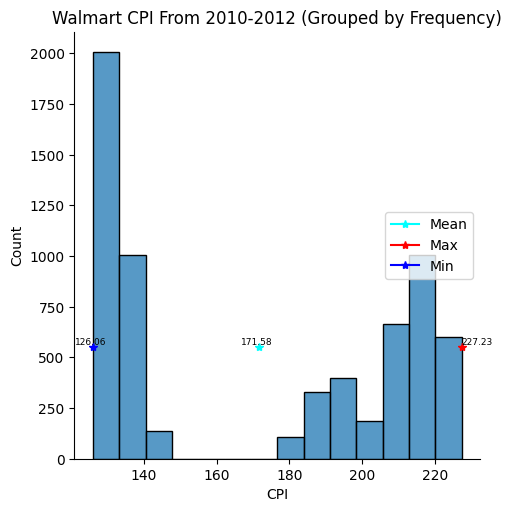

In [275]:
sns.displot(walmart_df, x="CPI")

totalmean = round(walmart_df["CPI"].mean(), 2)
totalmax = round(walmart_df["CPI"].max(), 2)
totalmin = round(walmart_df["CPI"].min(), 2)

plt.plot(totalmean, 550, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 5, 565, totalmean , fontdict={ 'size': 6.5})
plt.plot(totalmax, 550, marker = "*", label = "Max", color = "red")
plt.text(totalmax - .01, 565, totalmax, fontdict={ 'size': 6.5})
plt.plot(totalmin, 550, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 5, 565, totalmin, fontdict={ 'size': 6.5})

plt.legend(loc='right')
plt.title("Walmart CPI From 2010-2012 (Grouped by Frequency)")
plt.xlabel("CPI")

plt.show()


Below we make comparisons using correlation heatmap on the high performing store and the low performing store:

You can see that there is a strong negative correlation between CPI and Unemployment for the region relevant to each
of the stores, and that store 33 has the strongest negative correlation at around -.96, with store 20 sitting at around
-.73

C:\Users\joshu_yu92ohr\AppData\Local\Temp\ipykernel_2132\2589900713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 33].corr(), vmin=-1, vmax=1, annot=True)


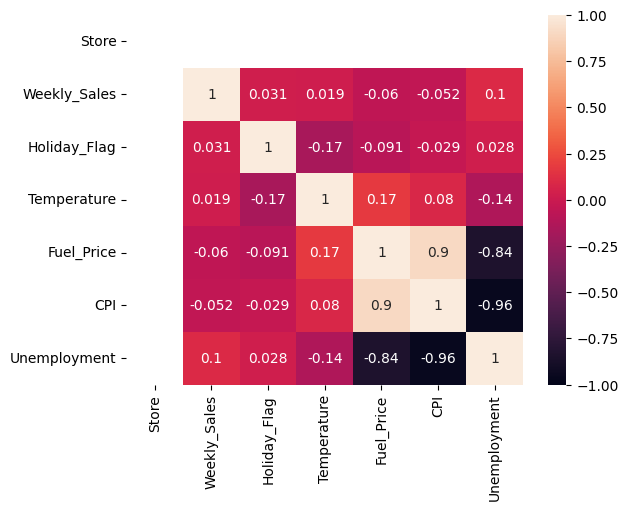

C:\Users\joshu_yu92ohr\AppData\Local\Temp\ipykernel_2132\2589900713.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 20].corr(), vmin=-1, vmax=1, annot=True)


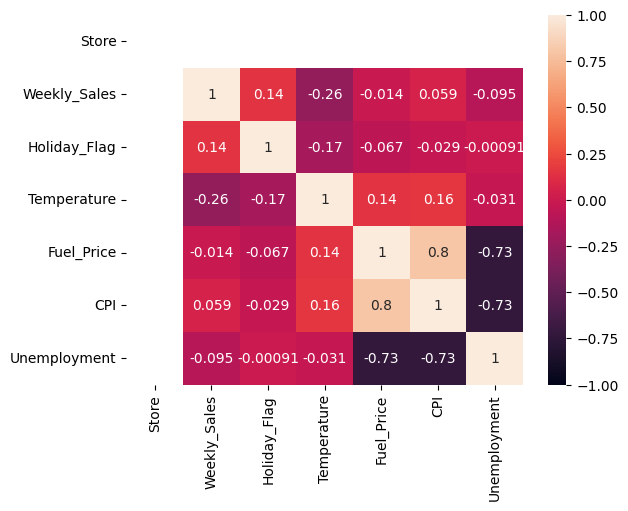

In [137]:
heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 33].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 20].corr(), vmin=-1, vmax=1, annot=True)
plt.show()


To better compare relevant data we printed out the heatmap for each store for comparison. After analyzing we prepared to find stores with similar characteristics and group them into their dataframes. I only chose to include factors that
were relevant most to the two stores above. 

Store: 1


C:\Users\joshu_yu92ohr\AppData\Local\Temp\ipykernel_2132\925333677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == x].corr(), vmin=-1, vmax=1, annot=True)


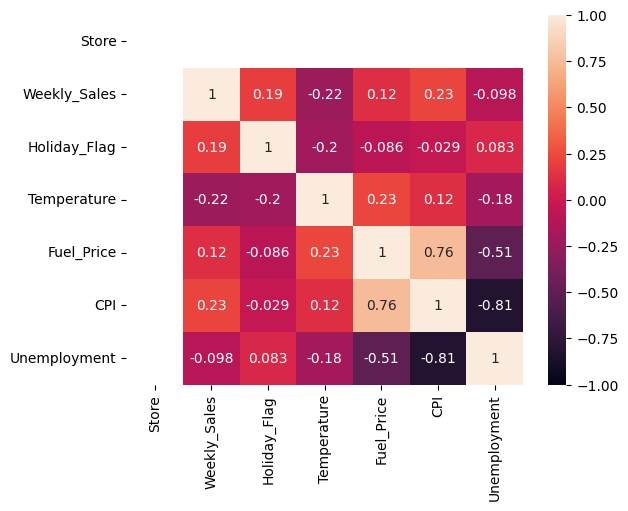

Store: 2


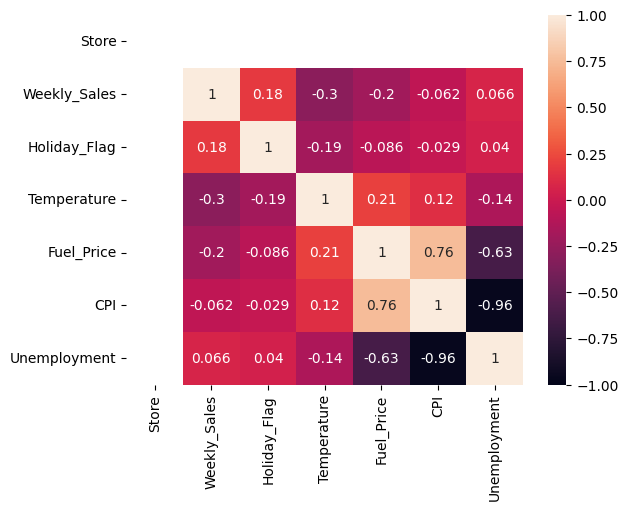

Store: 3


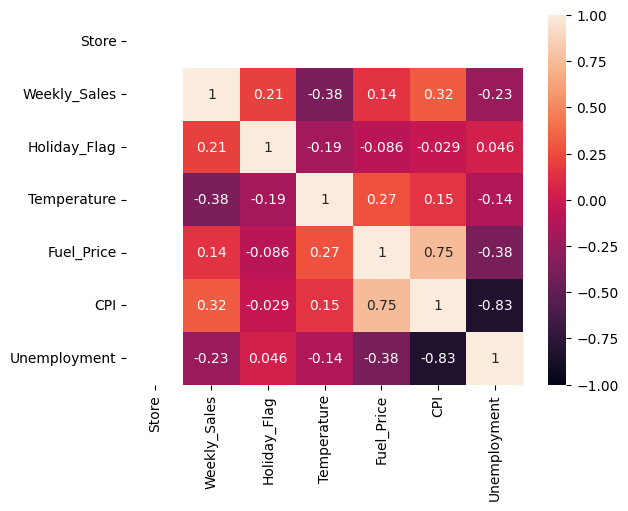

Store: 4


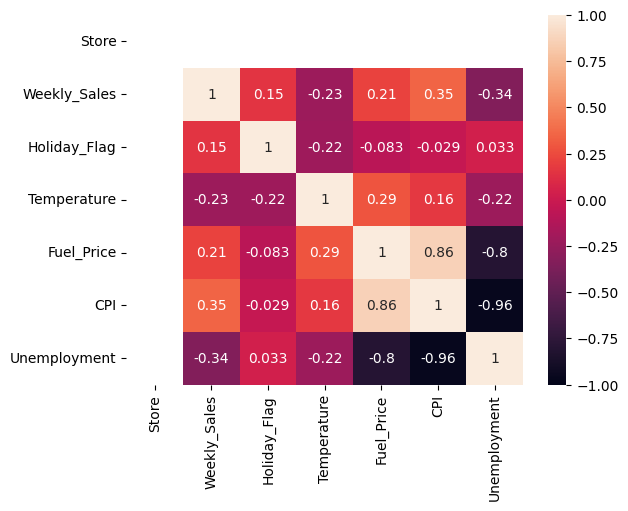

Store: 5


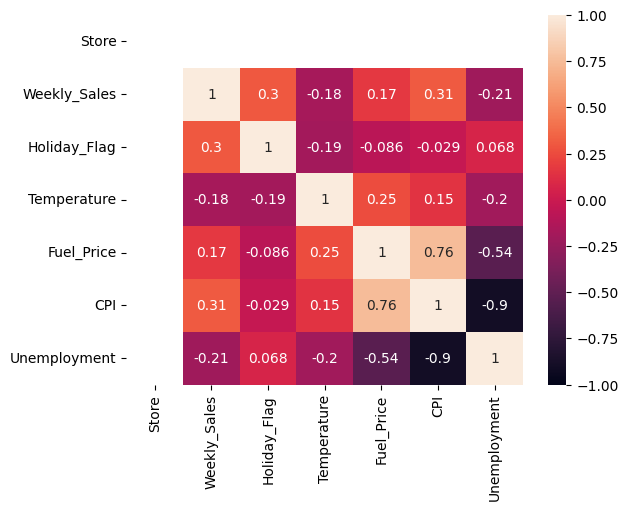

Store: 6


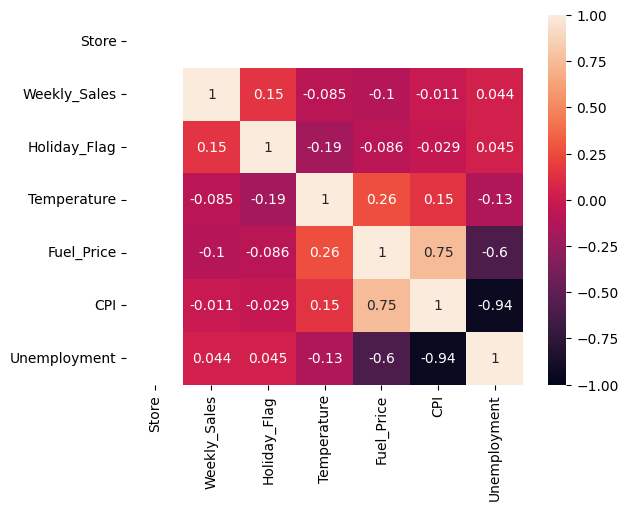

Store: 7


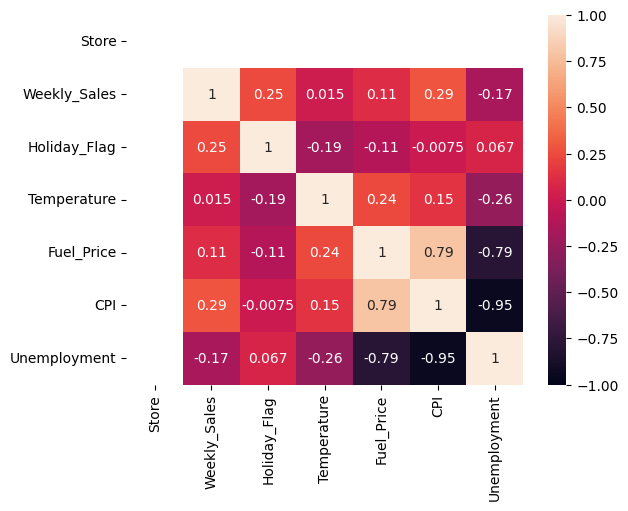

Store: 8


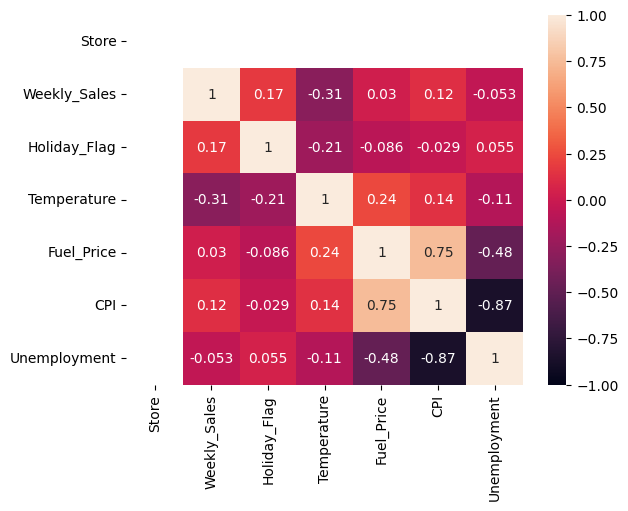

Store: 9


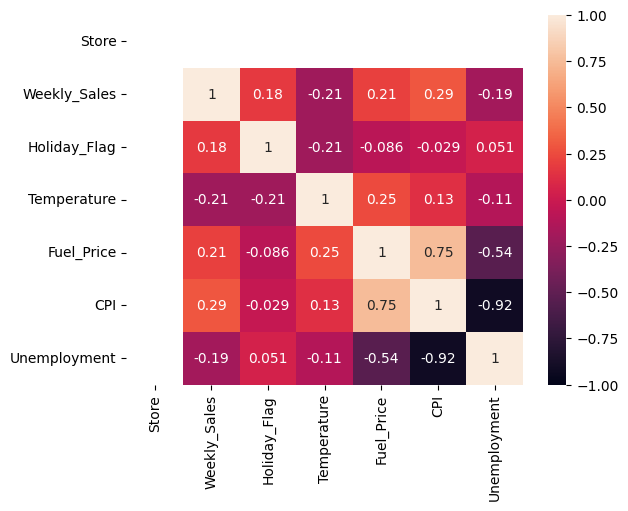

Store: 10


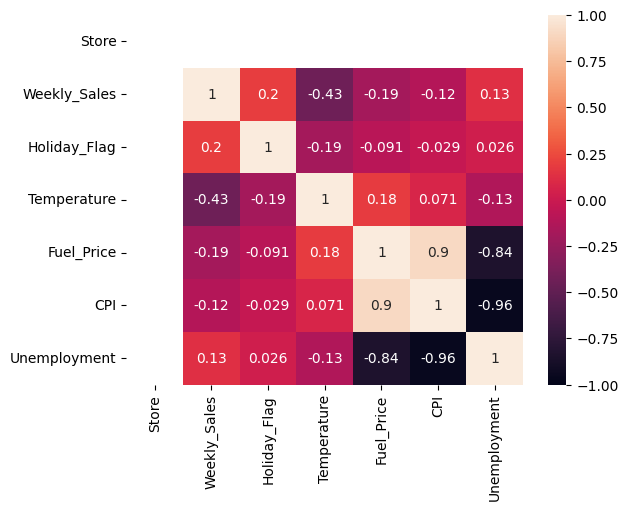

Store: 11


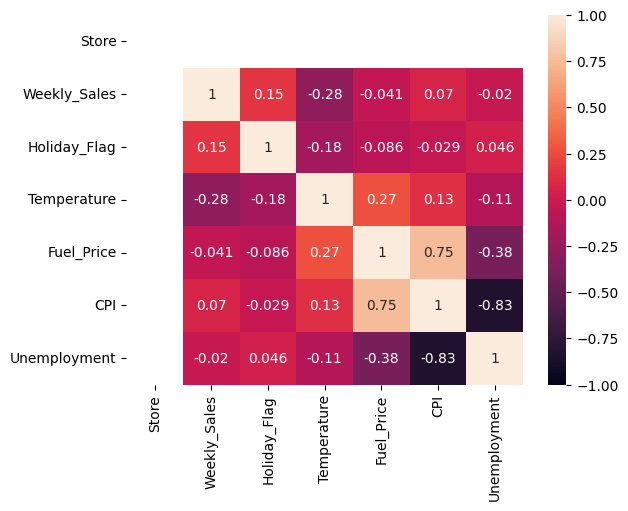

Store: 12


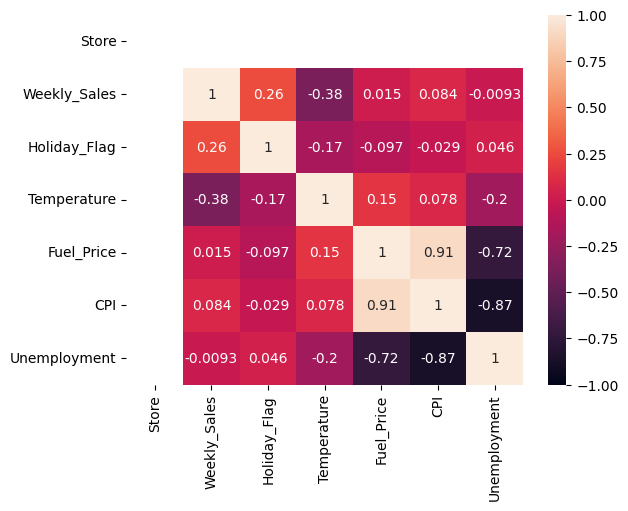

Store: 13


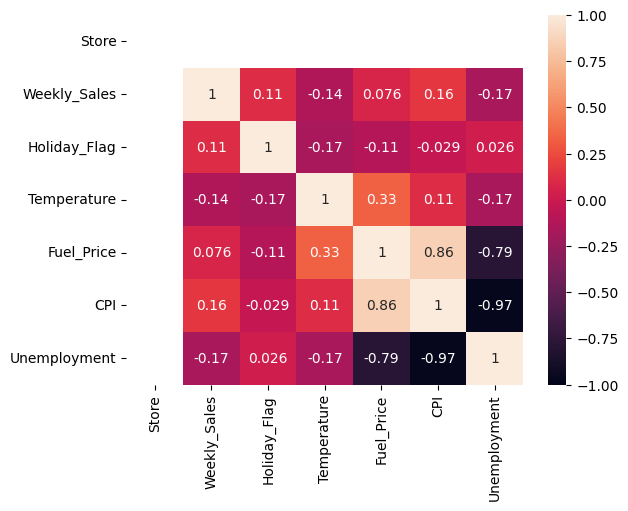

Store: 14


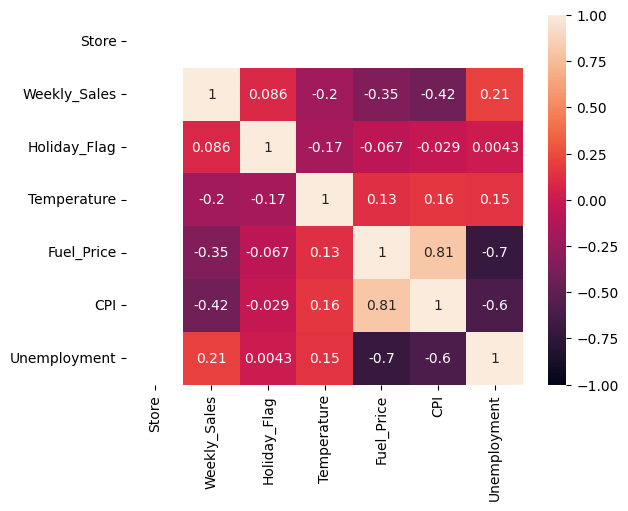

Store: 15


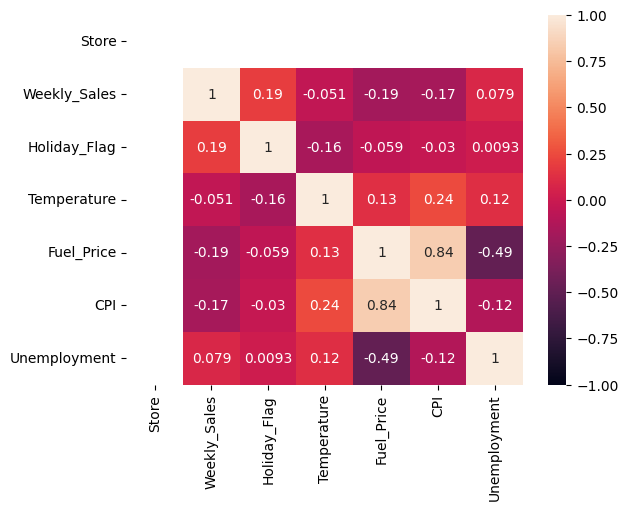

Store: 16


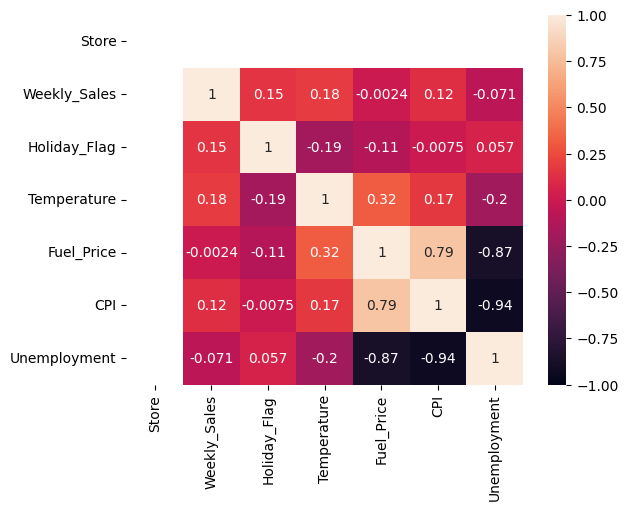

Store: 17


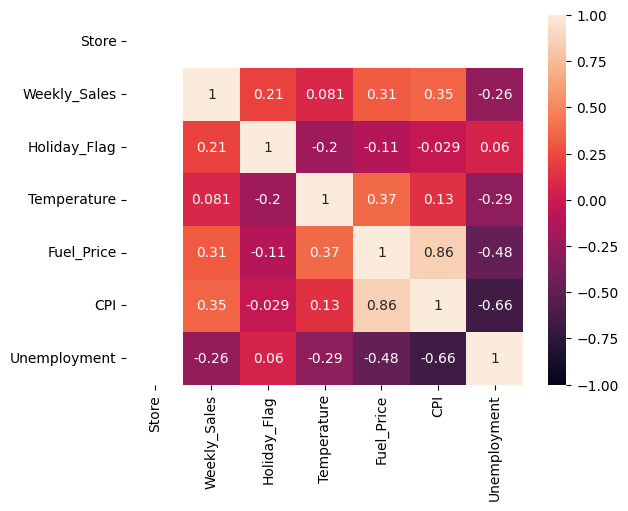

Store: 18


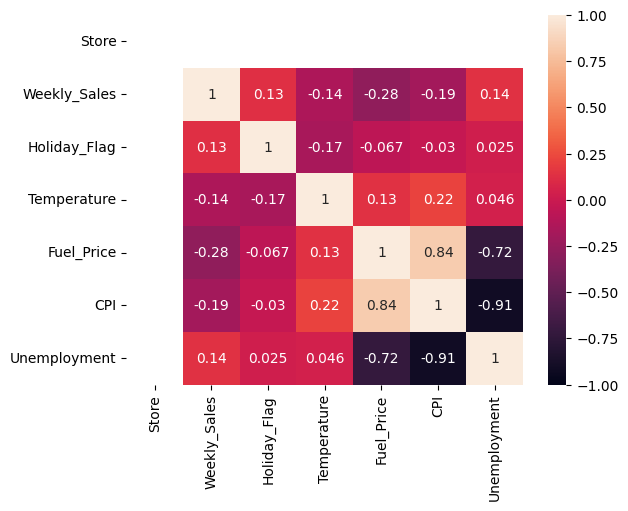

Store: 19


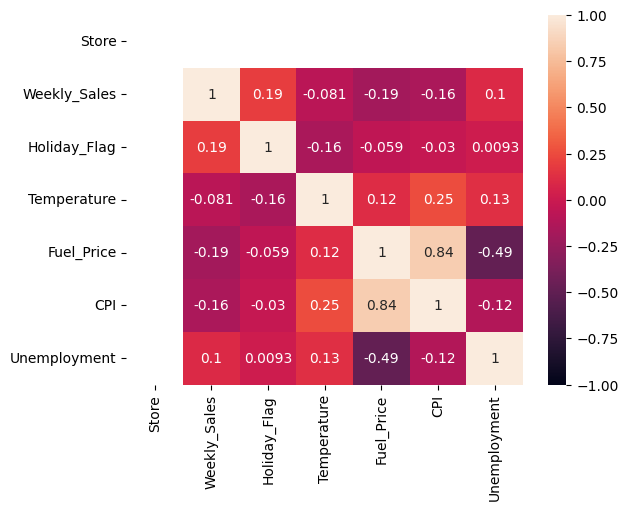

Store: 20


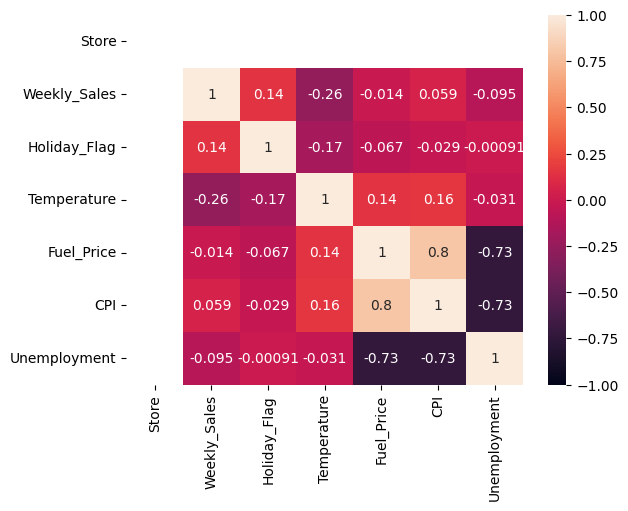

Store: 21


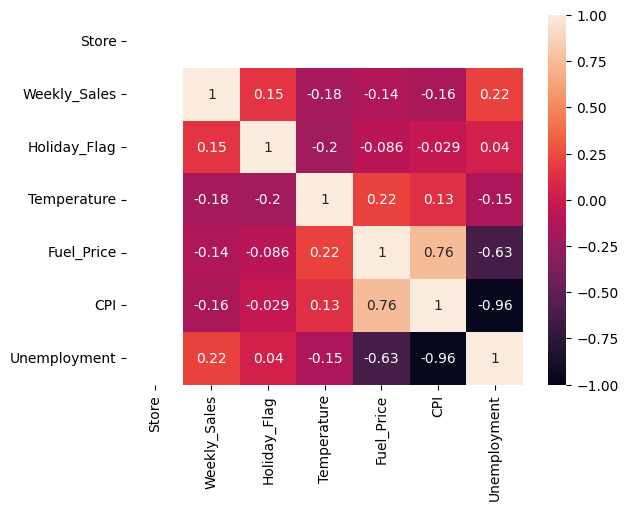

Store: 22


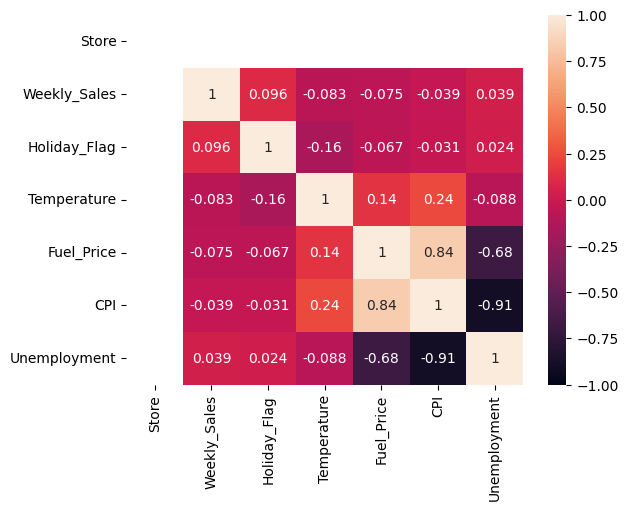

Store: 23


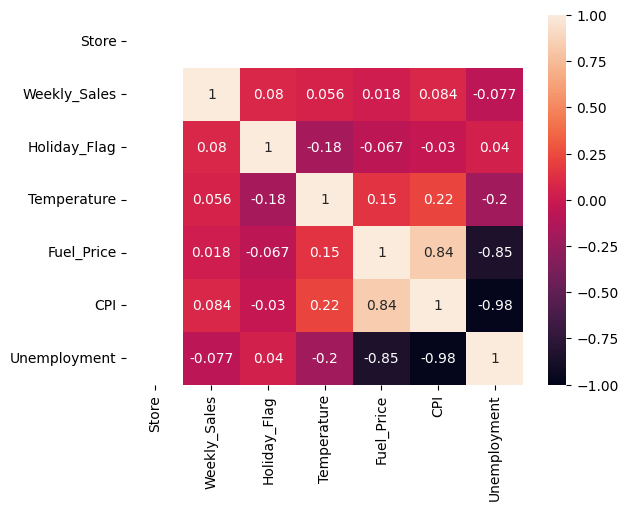

Store: 24


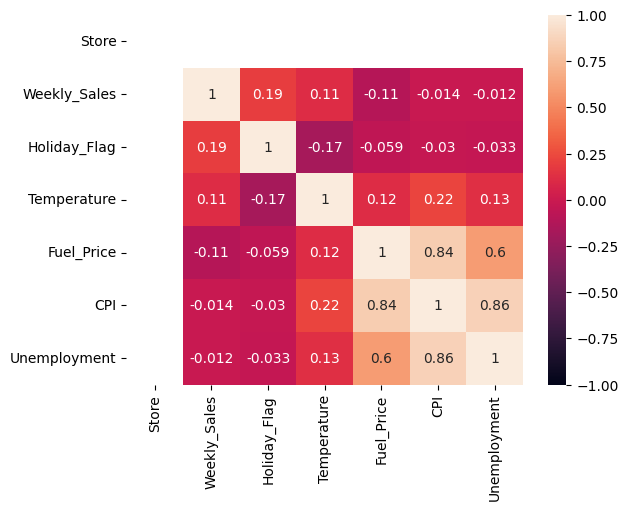

Store: 25


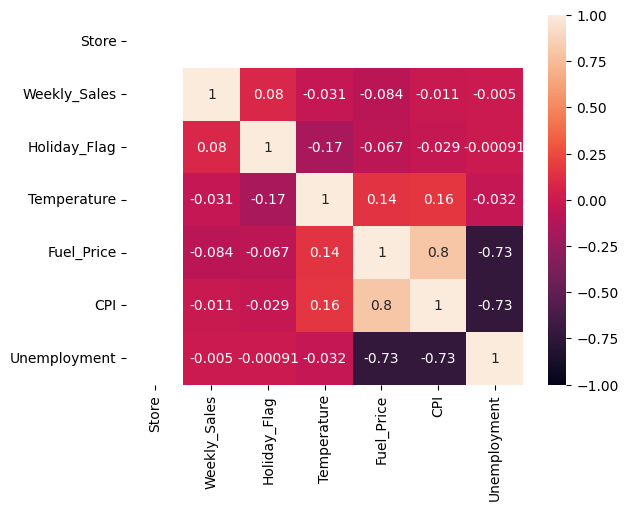

Store: 26


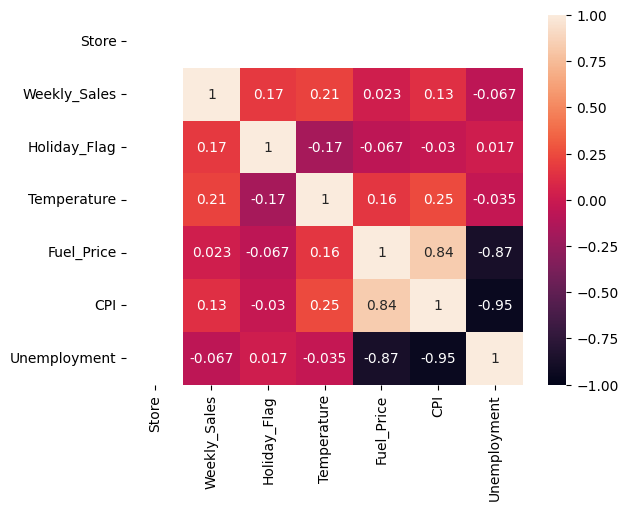

Store: 27


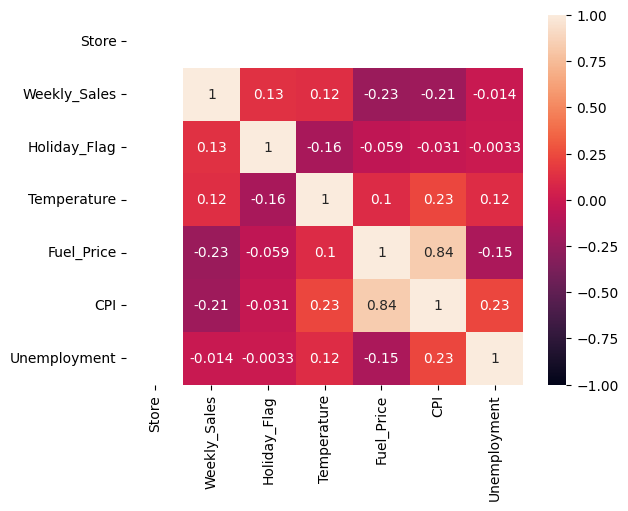

Store: 28


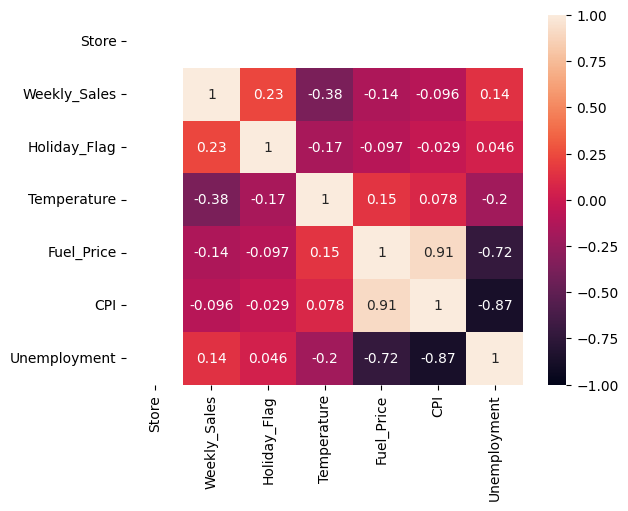

Store: 29


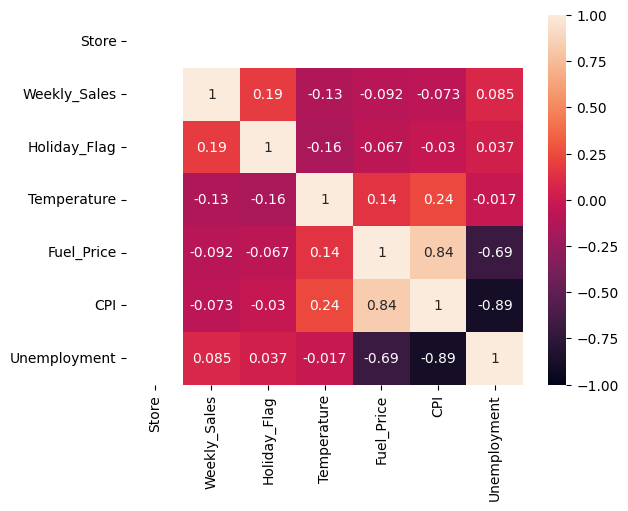

Store: 30


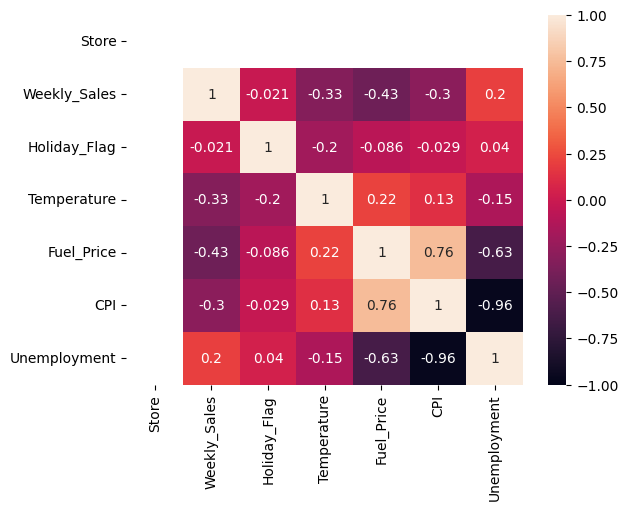

Store: 31


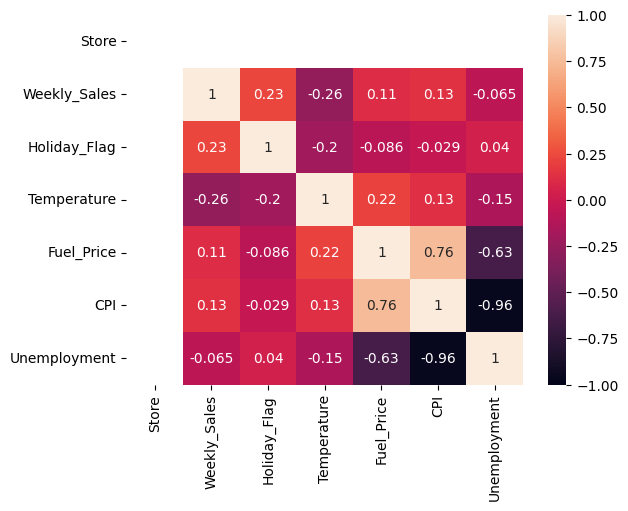

Store: 32


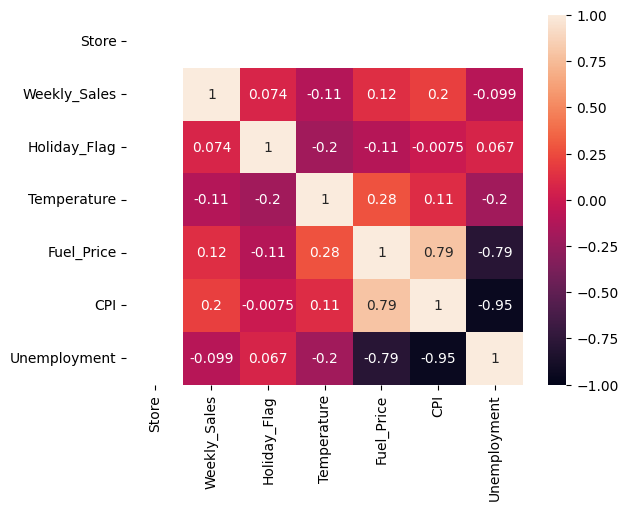

Store: 33


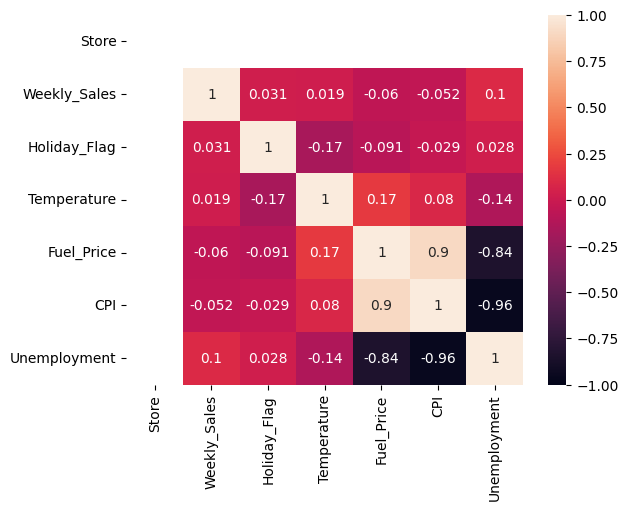

Store: 34


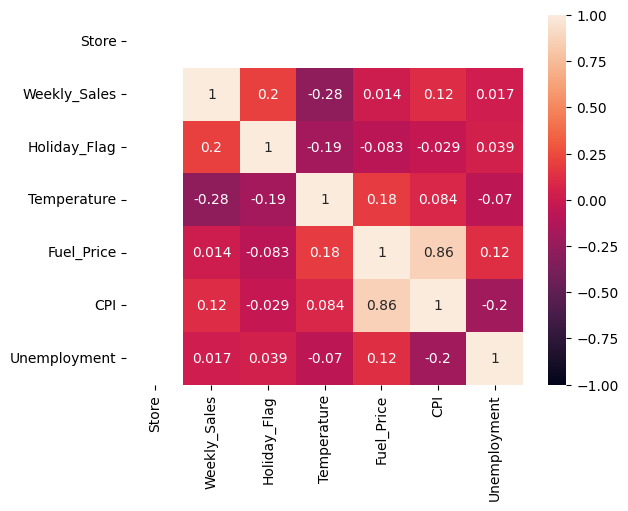

Store: 35


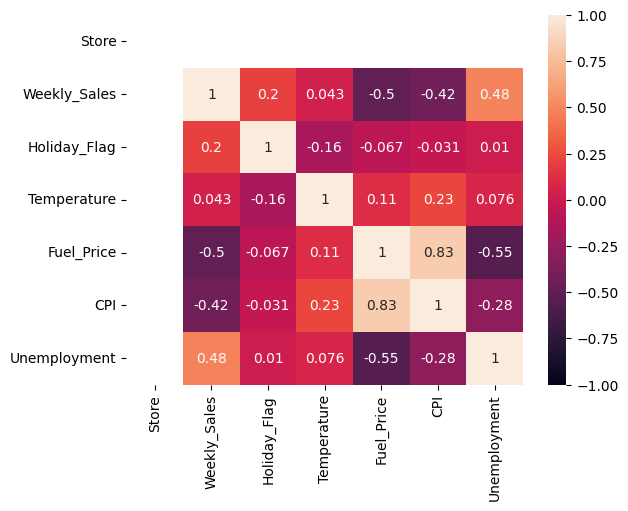

Store: 36


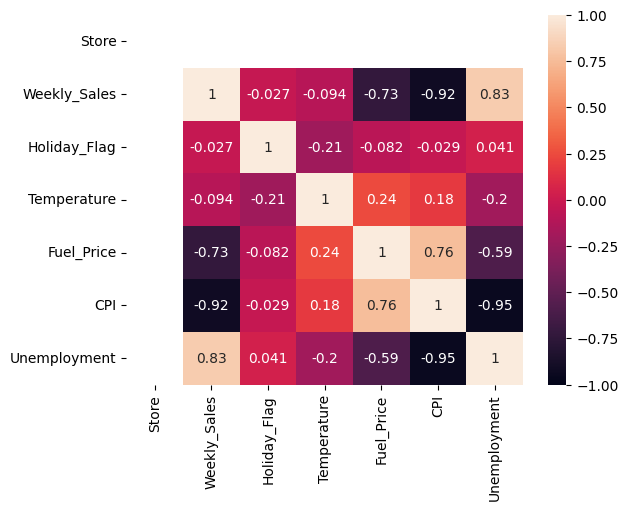

Store: 37


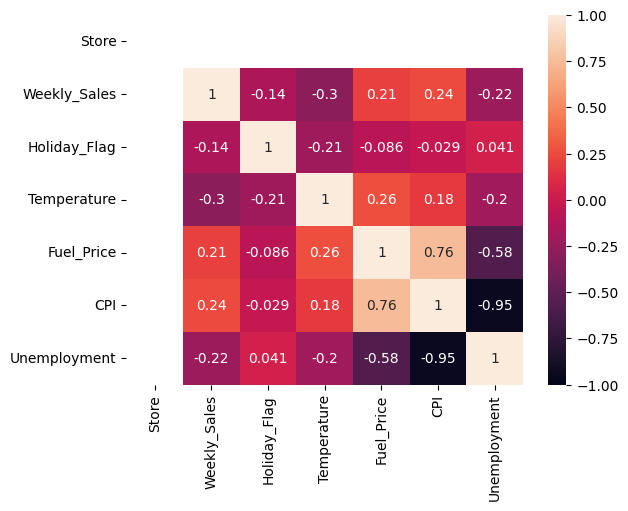

Store: 38


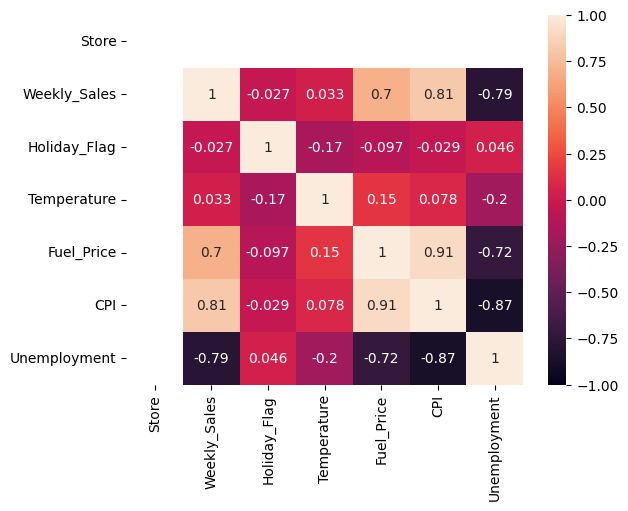

Store: 39


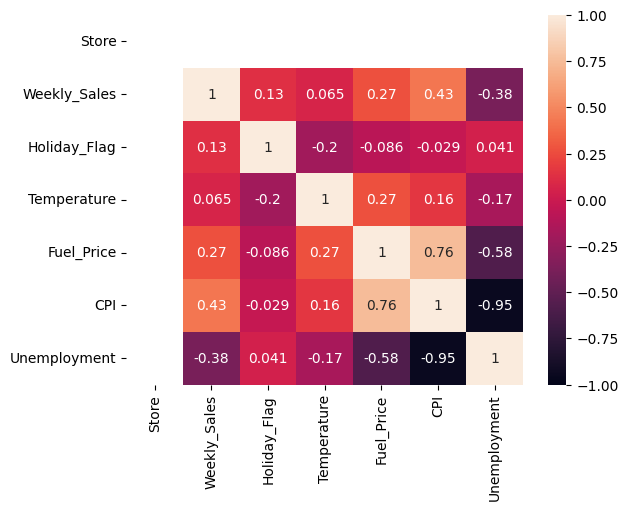

Store: 40


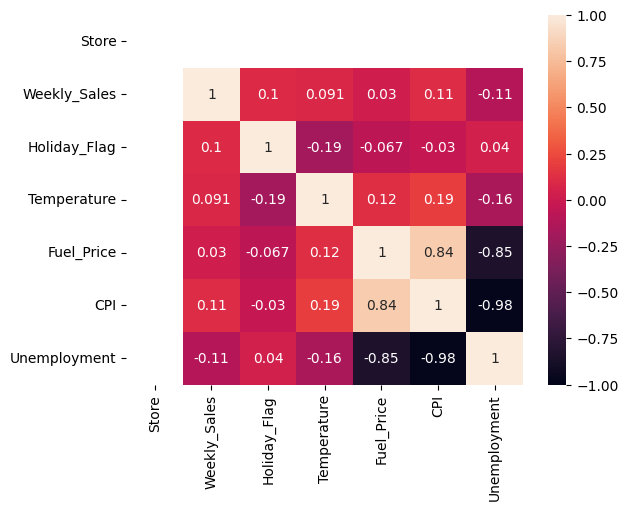

Store: 41


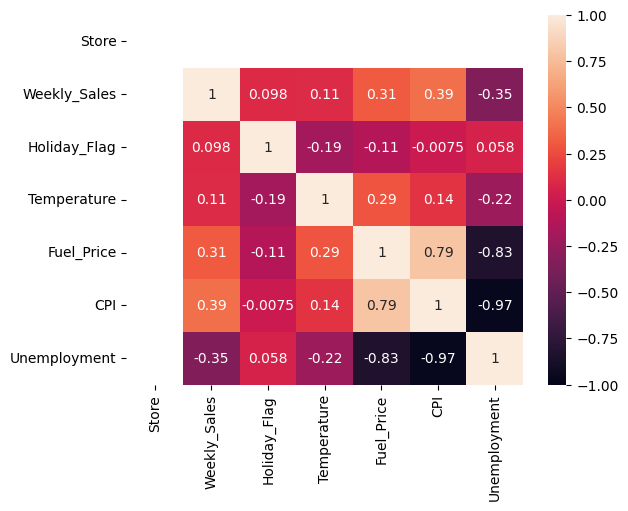

Store: 42


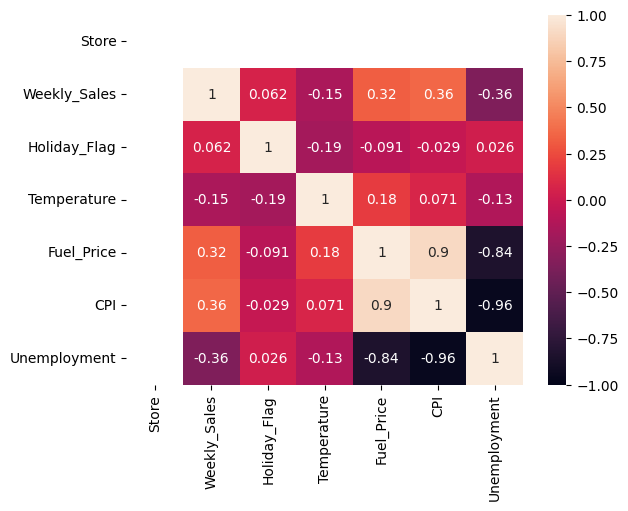

Store: 43


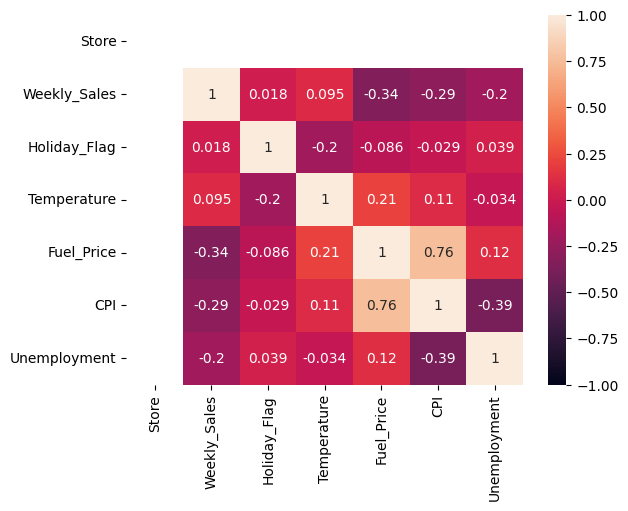

Store: 44


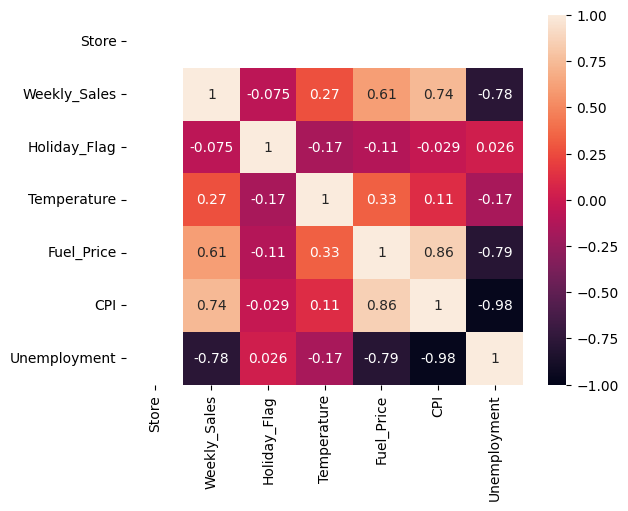

Store: 45


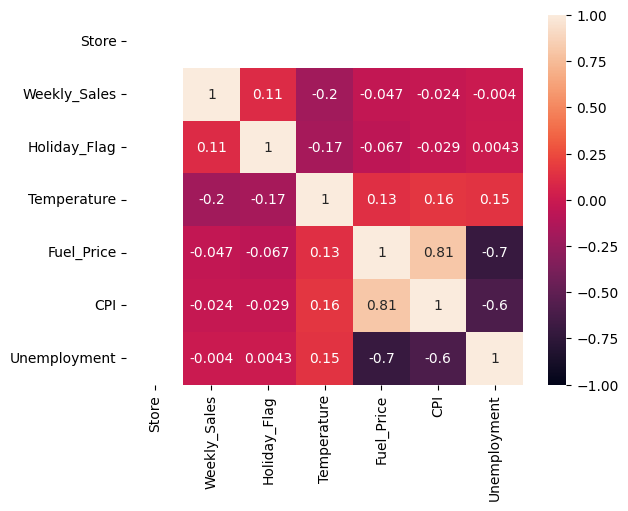

In [79]:
for x in range(1, 46):
    heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == x].corr(), vmin=-1, vmax=1, annot=True)
    print(f'Store: {x}')
    plt.show()

Below, we creatred 3 new dataframes with Stores containing the following correlations:

A strong negative or positive correlation between CPI and Weekly_Sales:
Stores 36, 33, 38

A strong negative or possitive correlation between CPI and Unemployment:
Stores 44, 23, 40, 24, and 27.

A strong negative or positive correlation between Fuel_Prices and Weekly_Sales:
Stores 30, 35, 36, 38

In [233]:
CPI_Weekly_df = pd.concat([Store36_df, Store44_df, Store38_df])


CPI_Unemployement_df = pd.concat([Store44_df, Store23_df, Store40_df, Store24_df, Store27_df])


Fuel_Weekly_df = pd.concat([Store30_df, Store35_df, Store36_df, Store38_df])


Below I chose to use a smooth kernal density chart with marginal histograms.

Below each of those I also included charts for each store showing the regression for each store in regards to their
CPI and their Weekly_Sales.

The charts below show just how drastically the cpi and weekly sales are correlated towards one another.

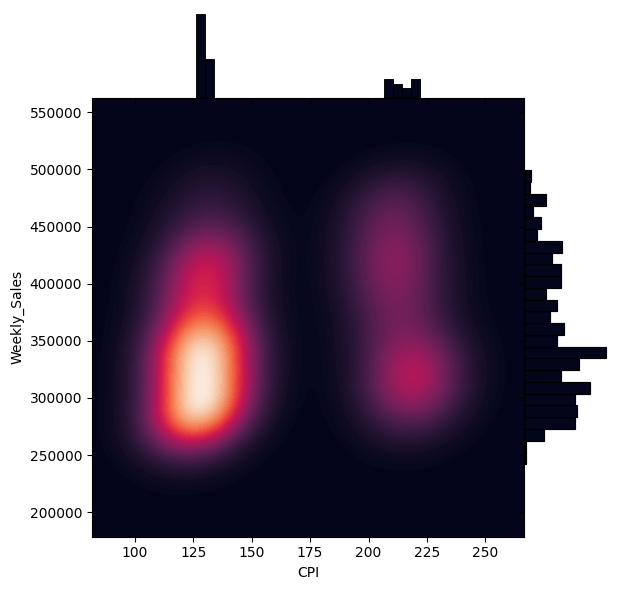

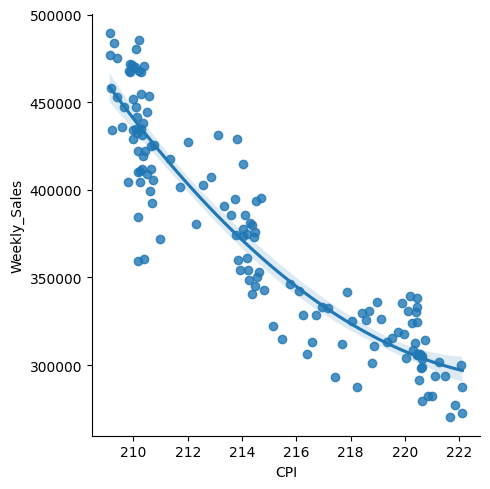

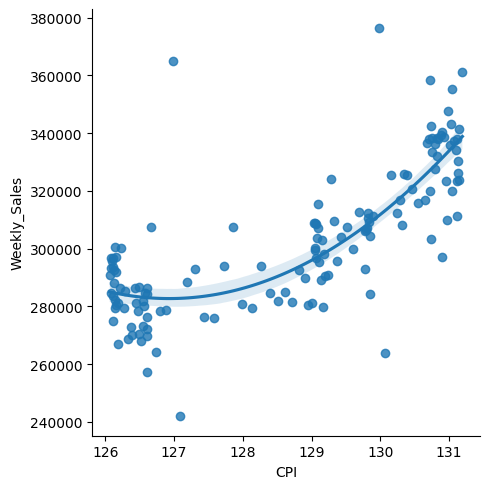

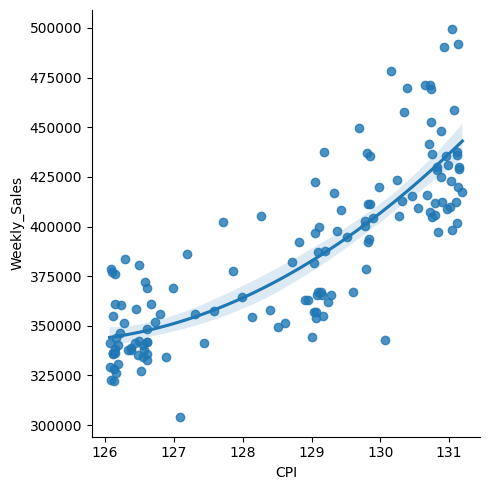

In [285]:
g = sns.JointGrid(data=CPI_Weekly_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store36_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store44_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store38_df, ci=90, order=2)

Using the same to factors as before, I repeated the process, but with Stores that had strong correlations between
fuel and weekly sales.

There doesnt seem to be an obvious pattern here, since some of the slopes indicate slight negative and positive slopes
regarding weekly sales and CPI.

I might note that the range of data for the fuel-to-weekly_sales correlation is higer than the previous comparison between
CPI and weekly sales. From this, we could make the inference that stores with high correlation between cpi and weekly_sales
generally have lower quantities in weekly sales. We could also make the assumption that when fuel has a stronger correlation with weekly sales,
the cpi affects the weekly sales much less.

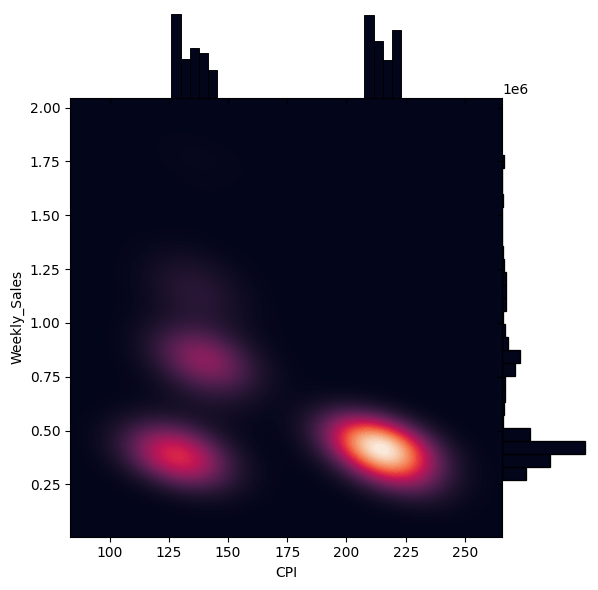

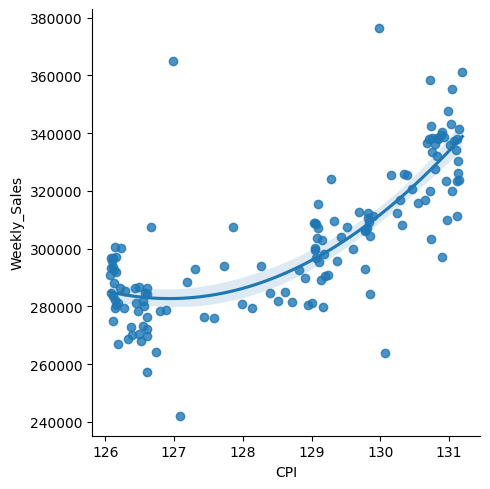

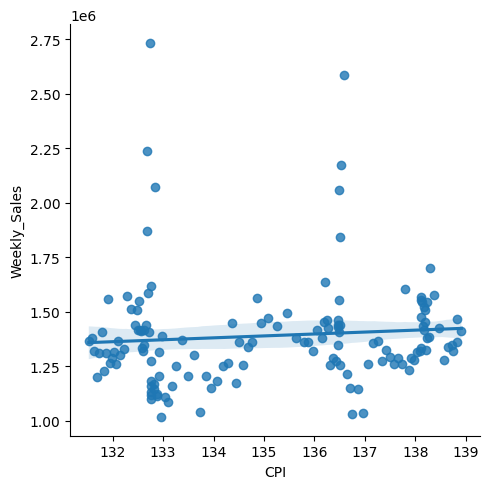

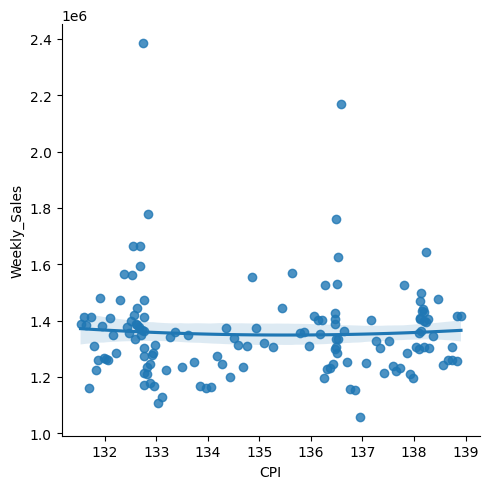

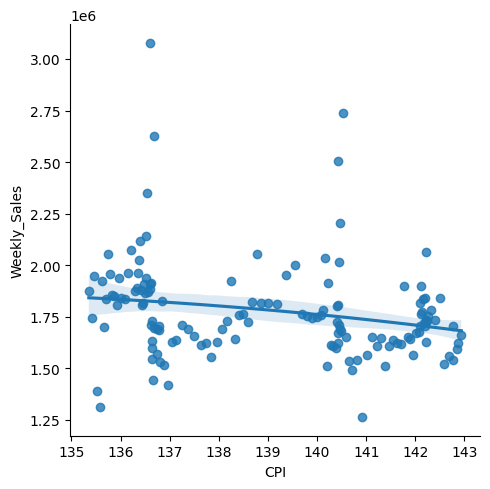

In [284]:
g = sns.JointGrid(data=Fuel_Weekly_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store44_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store23_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store24_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store27_df, ci=90, order=2)

Below we have instances where correlation between cpi and unemployment are strong. On this graph, you will notice that the slopes are much stronger
 regarding the relation between CPI and weekly sales. With the majority of the occuring as strong negative slopes, however, store 38 does possess a strong positive slope.


The average for this graph seems to lie somewhere between 1 and 1.5 million in weekly sales. Much higher than the previous 2 instances. 

From this we may make the inference that stores where the CPI and unemployment correlates most strongly, have a higher liklihood of a correlation with weekly sales and CPI.

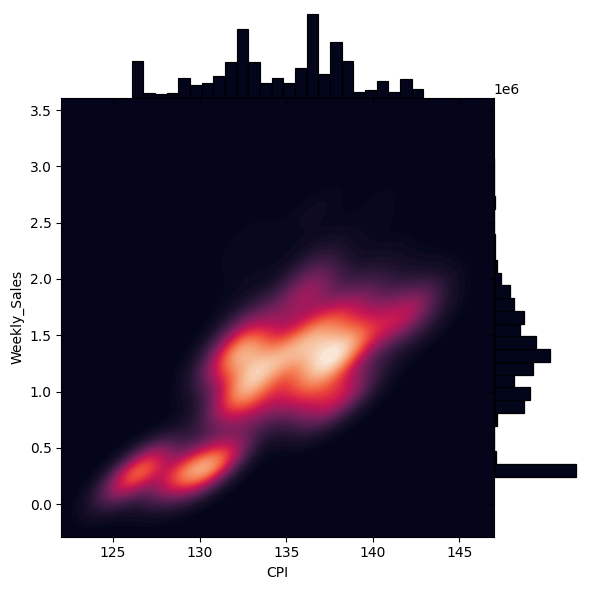

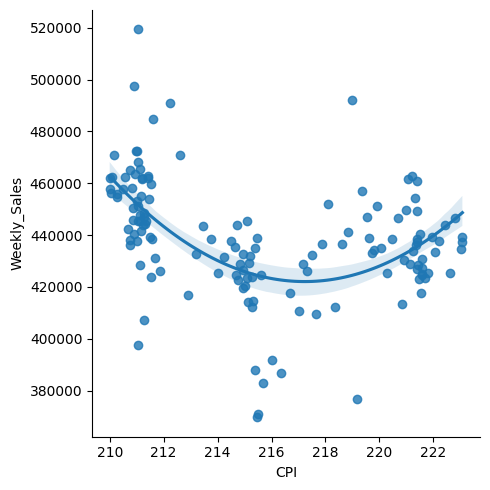

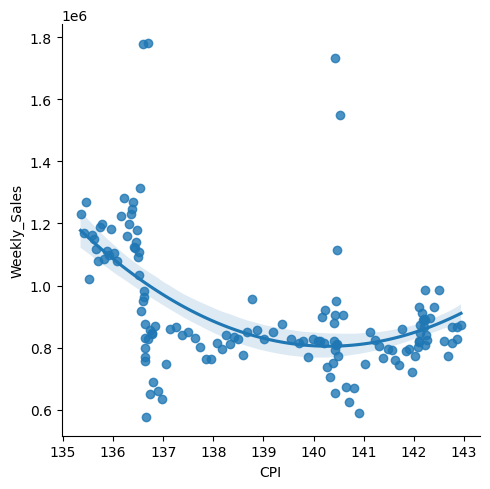

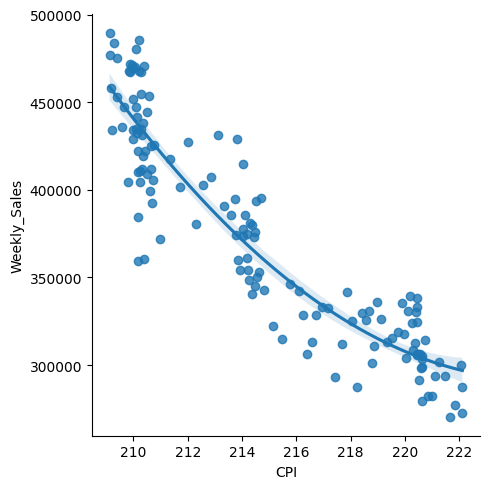

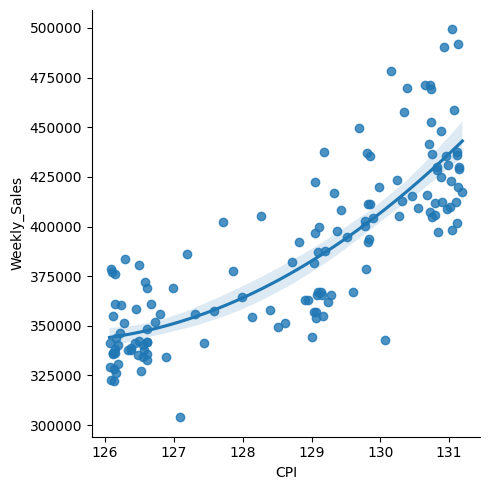

In [283]:
g = sns.JointGrid(data=CPI_Unemployement_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store30_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store35_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store36_df, ci=90, order=2)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store38_df, ci=90, order=2)

With that, let's go back and revisit our high and low store instances.

The low instance has a really strong negative correlation between unemployment and cpi, however, the sales seem to show a slope that isn't too postive or negative.
If you refer back to the correlation heatmap above, you will see that the correlation between cpi and weekly sales is low, despite that, we still se a curve overall.
The fuel to sales correlation is also low, which normally indicate a less curved line overall.

The heatmap density map below shows that the most weekly sales occur at around 130 CPI.

It is important to remember that a lot of factors are in play here. The region, the population of the surrounding area, the scale of warehouse.
All these factors are not accounted for in this project, so even though inferences can be made, without more data they cannot be made clear for every instance, especially outliers such as this one.



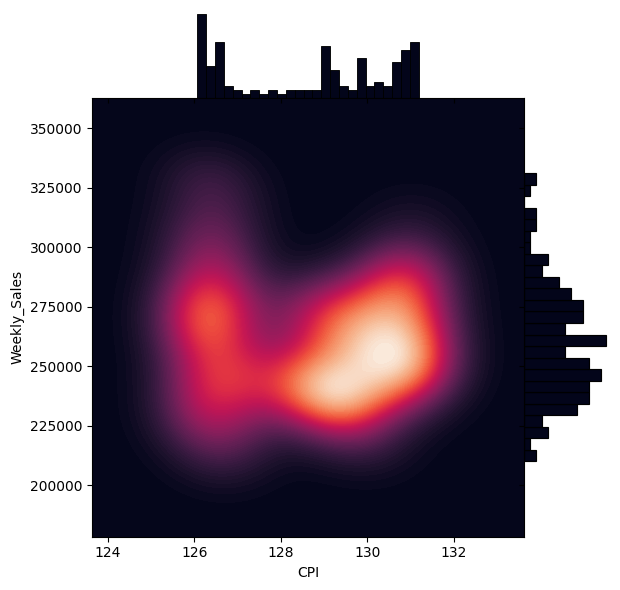

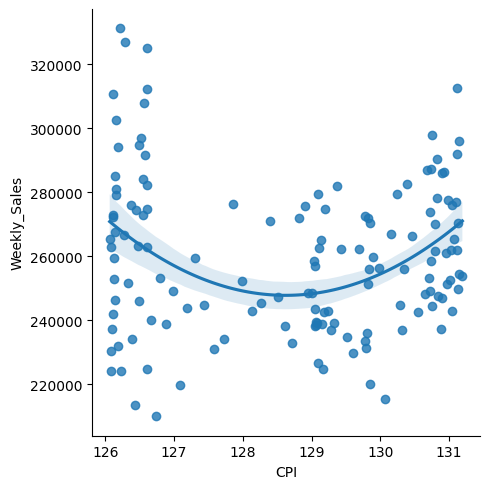

C:\Users\joshu_yu92ohr\AppData\Local\Temp\ipykernel_2132\90113264.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 33].corr(), vmin=-1, vmax=1, annot=True)


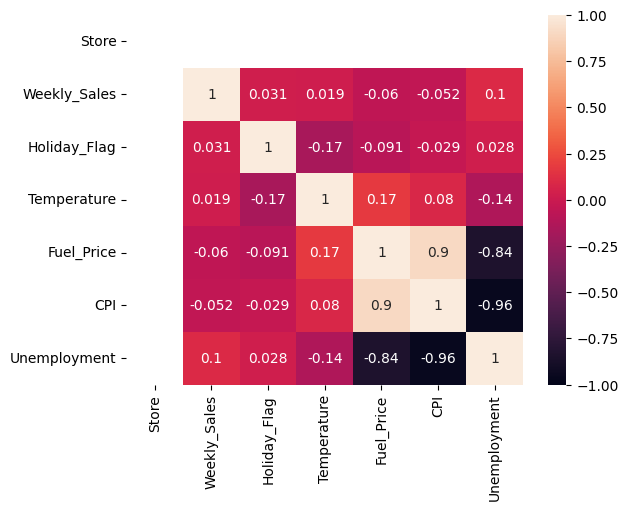

In [308]:
g = sns.JointGrid(data=Store33_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)


sns.lmplot(x='CPI', y='Weekly_Sales', data=Store33_df, ci=90, order=2)
plt.show()

heatmap = sns.heatmap(walmart_df[walmart_df["Store"] == 33].corr(), vmin=-1, vmax=1, annot=True)
plt.show()


If you call back to the correlation heatmap above, you may point out a few distinguishing factors for store 20.

It has a CPI to unemployment correlation .23 points higer than store 33, at -.73 which is low compared to some stores.
It's CPI to weekly sales correlation is almost 0, similar to store 33.

If you look at the density chart below. you will see that there are 3 points where the sales density spikes, and that is at below 205, at around 208, and at just below 215.

Once again, it is hard to make an inference, and I believe this issue stims from the fact that in both the high and low instances, they have a week cpi to weekly sales correlation overall.

However, I might mention that the curve is less noticable here, eventhough the fuel to weekly sales correlation is also low.


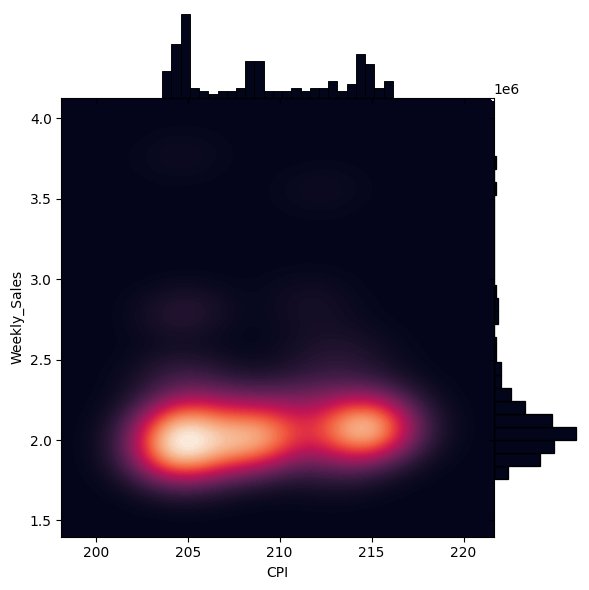

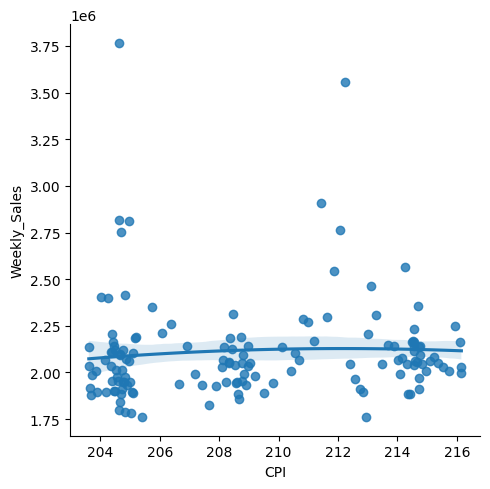

C:\Users\joshu_yu92ohr\AppData\Local\Temp\ipykernel_2132\1032772924.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(Store20_df.corr(), vmin=-1, vmax=1, annot=True)


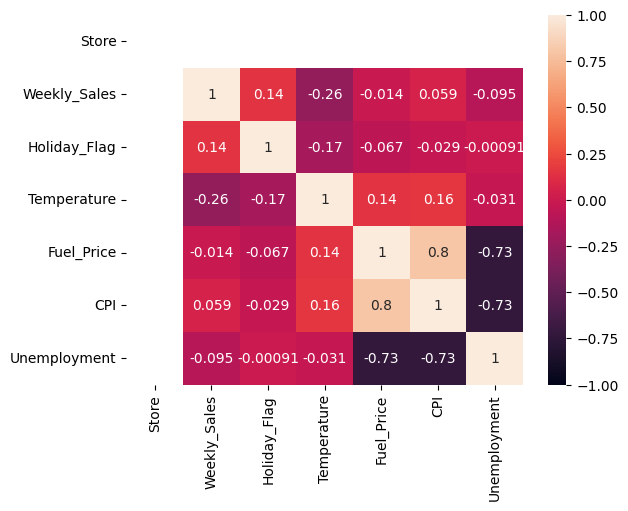

In [306]:
g = sns.JointGrid(data=Store20_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store20_df, ci=90, order=2)
plt.show()


heatmap = sns.heatmap(Store20_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Let's now refer to a couple of instances where the slope is strong.

For example, store 38, which has a strong positive slope regarding cpi and weekly sales, and store 36 which has a stron negative slope regarding the two.

Two things most notable when comparing these two instances is there placement along the CPI. Store 38 is placed ranging between 124 and 134 sloping upward, while store 36 ranges between 208 and 222 sloping downward.

The correlation between fuel and weekly sales are high, and most notably they are almost exactly the opposite of one another. The unemployment to cpi correlation is also high in both instances.

To get an idea of where these two stores may lie on the chart, why dont we take a look at the walmart dataframe as a whole.


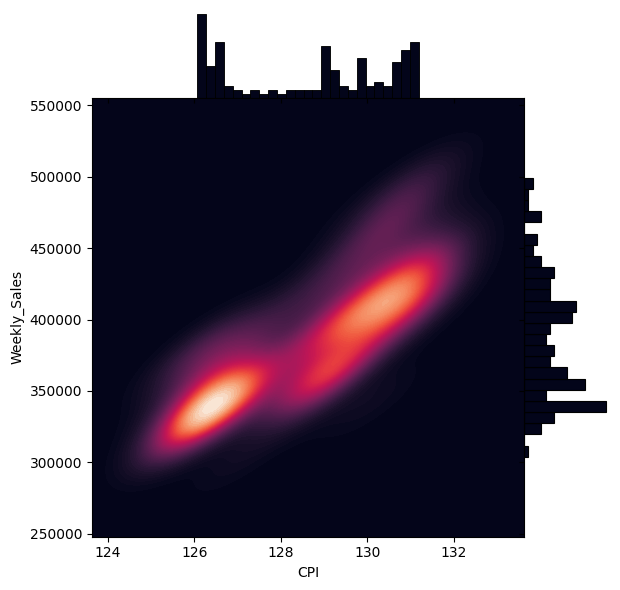

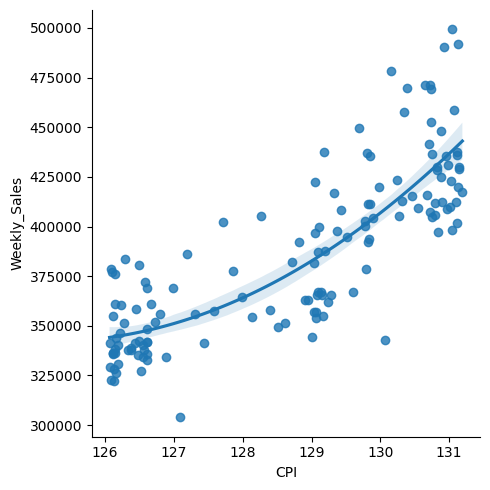

C:\Users\joshu_yu92ohr\AppData\Local\Temp\ipykernel_2132\808997440.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(Store38_df.corr(), vmin=-1, vmax=1, annot=True)


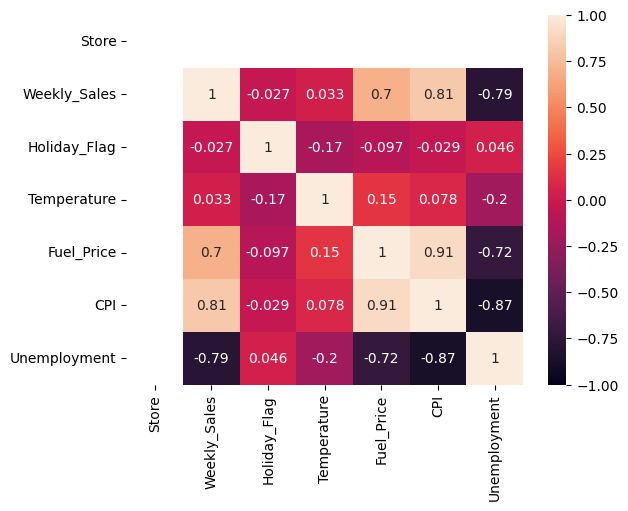

In [312]:
g = sns.JointGrid(data=Store38_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store38_df, ci=90, order=2)
plt.show()

heatmap = sns.heatmap(Store38_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

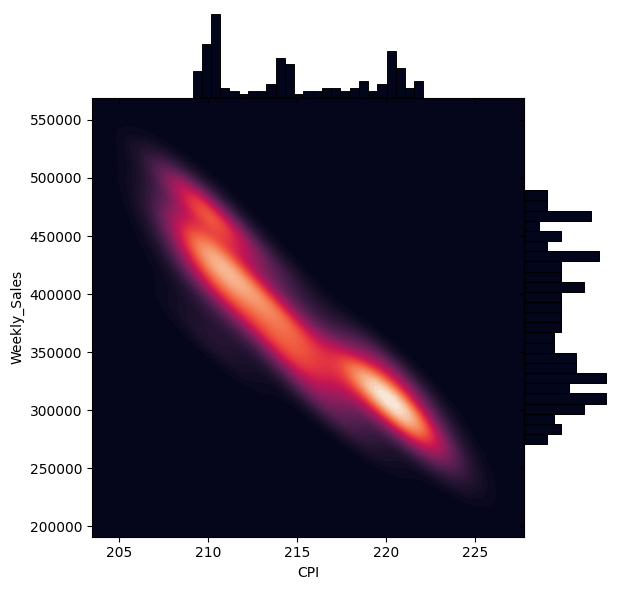

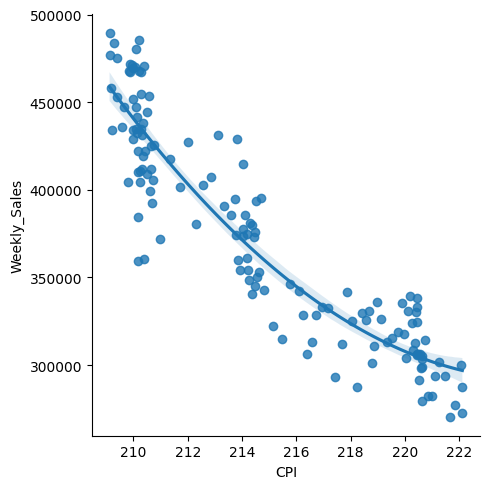

C:\Users\joshu_yu92ohr\AppData\Local\Temp\ipykernel_2132\285459188.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(Store36_df.corr(), vmin=-1, vmax=1, annot=True)


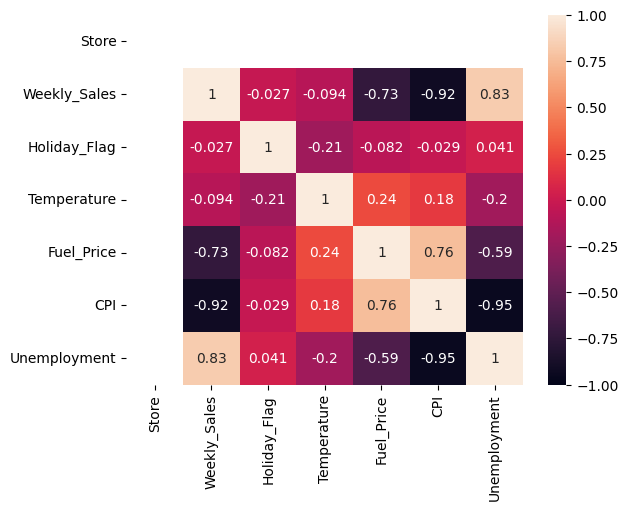

In [311]:
g = sns.JointGrid(data=Store36_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
sns.lmplot(x='CPI', y='Weekly_Sales', data=Store36_df, ci=90, order=2)
plt.show()

heatmap = sns.heatmap(Store36_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Below we have charts referencing the walmart dataframe.

The first thing one may notice here is that there is a pit in the middle of the density table below, ranging between 140 and ranging between 180 and 200.

I decided to break up the data into two charts proceeding after the density chart.

These two charts compare below 150, and above 180.

You will notice as the cpi moves more inward toward the pit the weekly cpi curves up, and ass it expands outward it flattens out. 

My inference towards this data is that as the cpi approaches these to instances, it becomes more favorable for sales to occur.

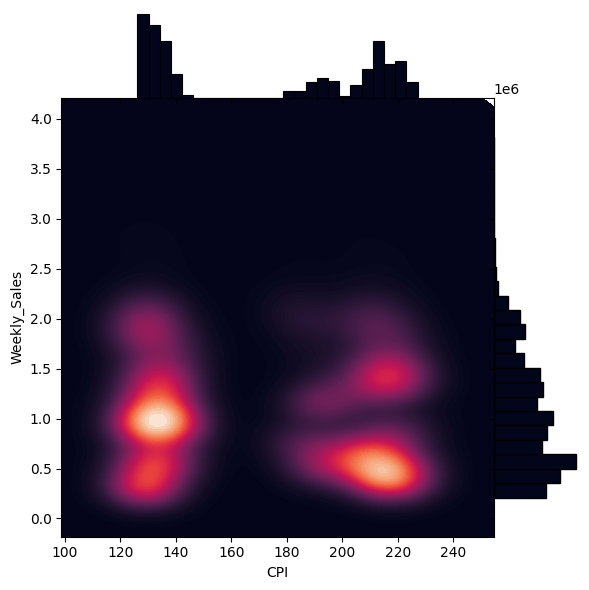

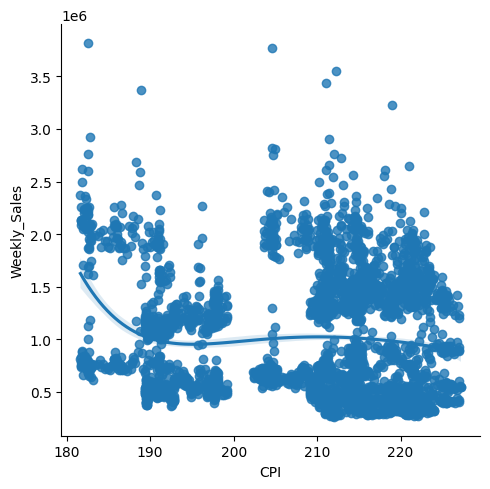

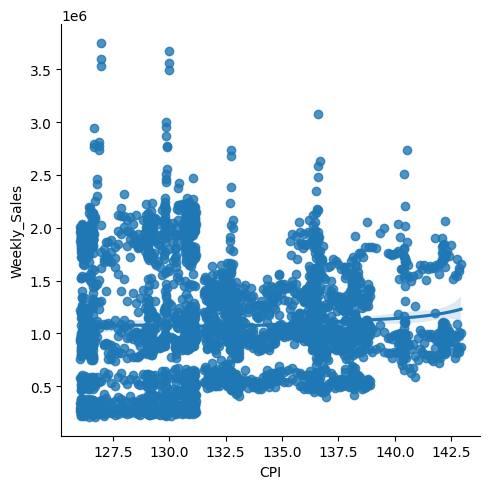

In [304]:
g = sns.JointGrid(data=walmart_df, x="CPI", y="Weekly_Sales",space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

sns.lmplot(x='CPI', y='Weekly_Sales', data=walmart_df[walmart_df["CPI"] > 180], ci=90, order=5)
plt.show()
sns.lmplot(x='CPI', y='Weekly_Sales', data=walmart_df[walmart_df["CPI"] < 150], ci=90, order=5)
plt.show()

When observing this there is a more obvious pattern overall between all stores. As the CPI approaches
the midpoint of the graph, around 160, the bottom line increase.

As you travel further outward from 160 CPI, the ranges begin to increase, but the bottom line lowers.

However there is one major correlation I have found and havent mentioned thus far. The likelihood cpi
correlates to weekly sales also relates to the weekly sales amounts occuring. Stores with larger sales tend to have less aggressive slopes and curves.

This could be because the store is placed in an area with high density, and lots of demand. While stores in low dense areas 
have may have varying demand depending on the conditions.

This might explain why the gas prices would correlate so strongly with weekly sales, especially since if a store is placed in an area
of low density, then people would have to travel further to shop there. 